In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
movies = pd.read_csv('C:\\Users\\11kik\\Desktop\\kiko\\programiranje\\learning Python\\Advanced visualisation\\P4-Movie-Ratings.csv')

In [4]:
movies.head()

,Film,Genre,Rotten_Tomatoes_Ratings%,Audience_Ratings%,Budget(million_$),Year_of_release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Film                      559 non-null    object
 1   Genre                     559 non-null    object
 2   Rotten_Tomatoes_Ratings%  559 non-null    int64 
 3   Audience_Ratings%         559 non-null    int64 
 4   Budget(million_$)         559 non-null    int64 
 5   Year_of_release           559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [6]:
# changing data types for certain columns
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year_of_release = movies.Year_of_release.astype('category')

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Film                      559 non-null    category
 1   Genre                     559 non-null    category
 2   Rotten_Tomatoes_Ratings%  559 non-null    int64   
 3   Audience_Ratings%         559 non-null    int64   
 4   Budget(million_$)         559 non-null    int64   
 5   Year_of_release           559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [8]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [9]:
movies.columns = ['Film','Genre','Critics_rating','Audience_Rating','Budget($m)','Year']
movies.head()

,Film,Genre,Critics_rating,Audience_Rating,Budget($m),Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [10]:
movies.describe()

,Critics_rating,Audience_Rating,Budget($m)
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


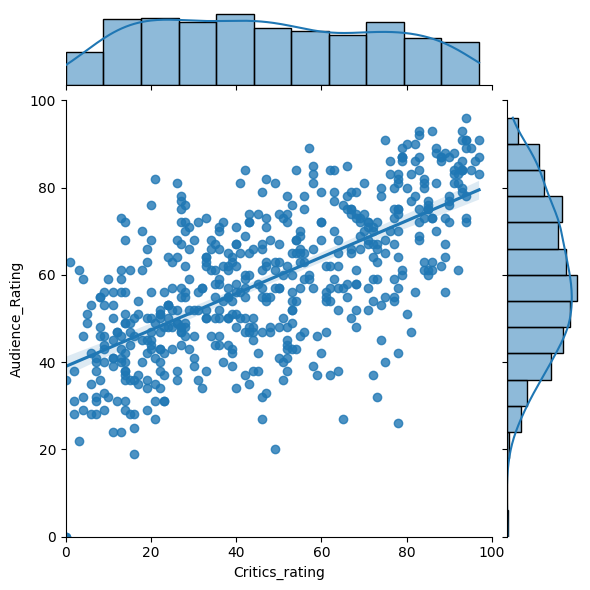

In [11]:
# correlation between Critics_rating and Audience_Rating
j_reg = sns.jointplot(data=movies, x='Critics_rating', y='Audience_Rating', xlim=(0, 100), ylim=(0, 100), kind="reg")

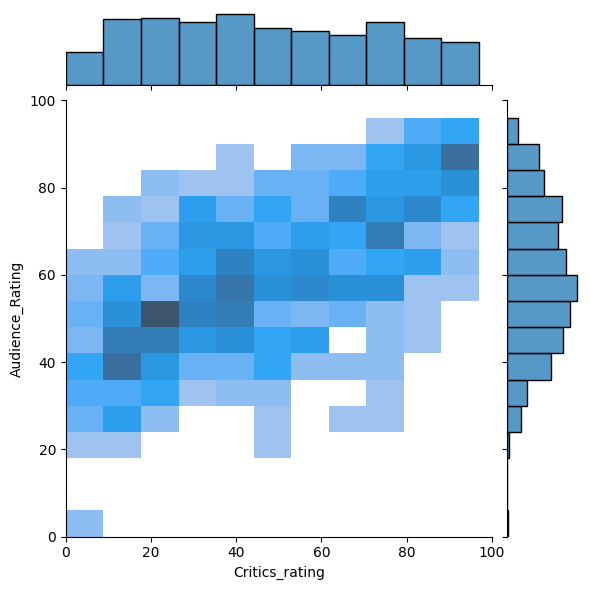

In [12]:
j_hist = sns.jointplot(data=movies, x='Critics_rating', y='Audience_Rating', xlim=(0, 100), ylim=(0, 100), kind="hist")

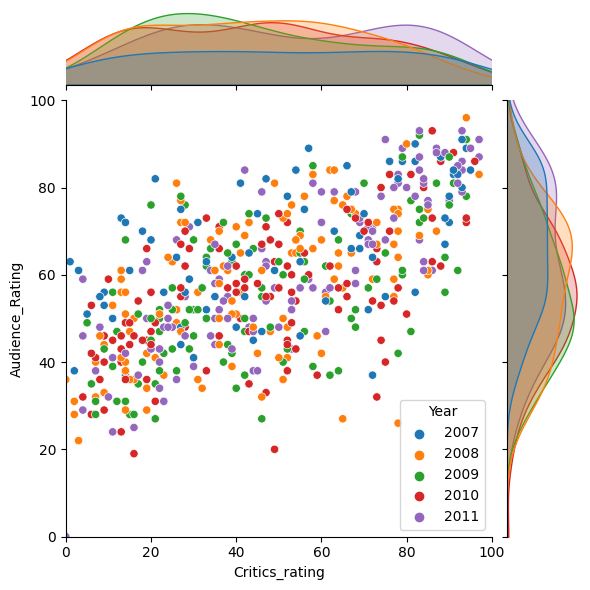

In [13]:
j_year = sns.jointplot(data=movies, x='Critics_rating', y='Audience_Rating', xlim=(0, 100), ylim=(0, 100), hue="Year")

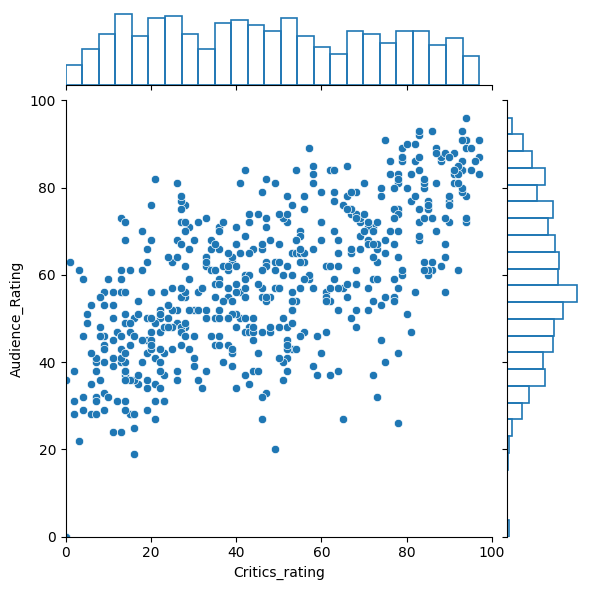

In [14]:
j_nofill = sns.jointplot(
    data=movies, 
    x='Critics_rating', 
    y='Audience_Rating', 
    xlim=(0, 100), 
    ylim=(0, 100), 
    marginal_kws=dict(
        bins=25, 
        fill=False
    )
)

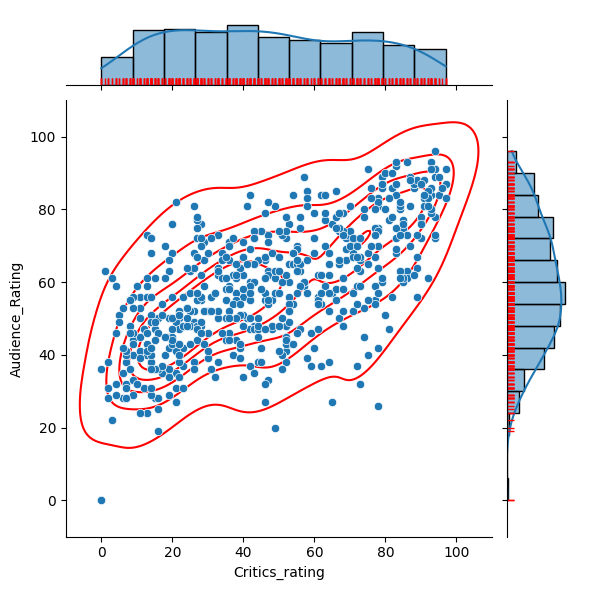

In [15]:
# add more layers onto the plot, using the methods on the JointGrid object that jointplot() returns
j_reg = sns.jointplot(data=movies, x='Critics_rating', y='Audience_Rating', xlim=(-10, 110), ylim=(-10, 110), marginal_kws=dict(kde=True))
j_reg.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
j_reg.plot_marginals(sns.rugplot, color="r", height=.1, clip_on=False)


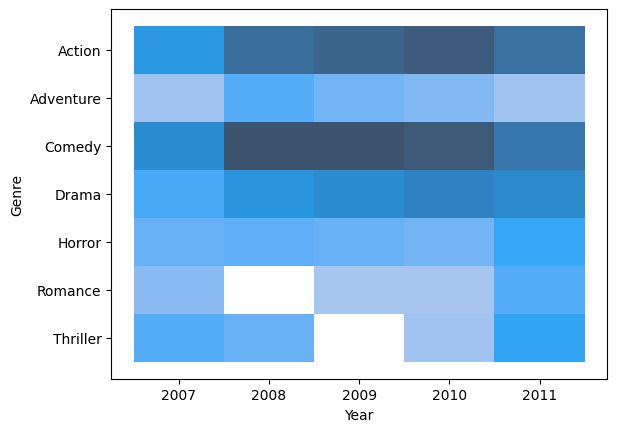

In [17]:
h1 = sns.histplot(data=movies, x="Year", y='Genre')

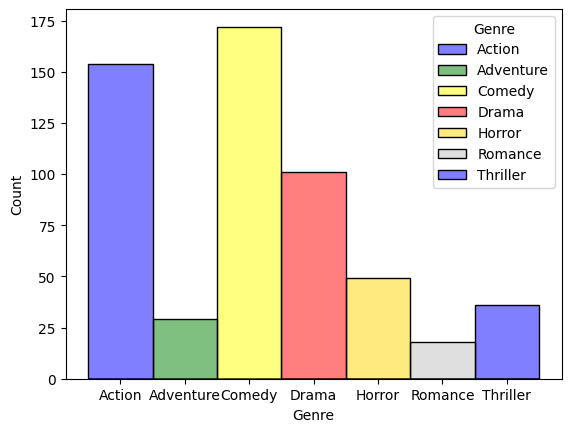

In [18]:
colors = ['blue','green','yellow','red','gold','silver']
h2 = sns.histplot(data=movies, x="Genre", hue='Genre', palette=colors)

In [27]:
movies.rename(columns={'Budget($m)':'BudgetUSDm'}, inplace=True)


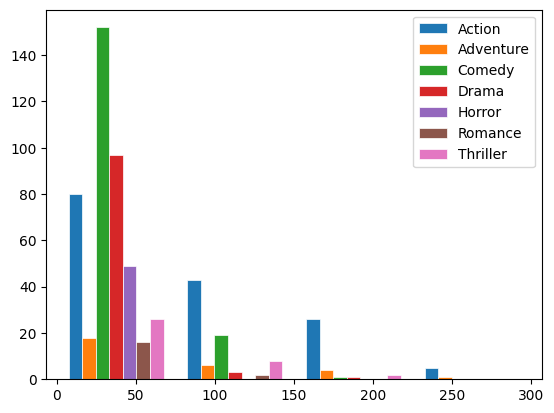

In [69]:
# creating hist_plot for presenting the Budget per Genre, where x (the horisontal axis is Budget) and y (vertical axis is count)

list_h3 = []
lgnd = []

for gnr in movies.Genre.cat.categories:
    list_h3.append(movies[movies.Genre == gnr].BudgetUSDm)
    lgnd.append(gnr)

hist1 = plt.hist(list_h3, stacked=False, bins=4, linewidth=0.5, edgecolor="white", label=lgnd)
plt.legend()
plt.show()
